COMPANY_DATA DECISION TREE

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [5]:
data=pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


**EDA**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [34]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder


In [44]:
ld=LabelEncoder()
data['ShelveLoc']=ld.fit_transform(data['ShelveLoc'])
data['Urban']=ld.fit_transform(data['Urban'])
data['US']=ld.fit_transform(data['US'])

In [45]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


We need to convert sales into categorical variable. So we will take mean as threshold which is equal to 7.49

In [46]:
sales=[]
for val in data['Sales']:
  if val > 7.49:
    sales.append('high')
  else:
    sales.append('low')
data['sales1']=sales

In [47]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


DIVIDING X AND Y

In [48]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

**BUILDING MODEL USING ENTROPY**

In [50]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [51]:
y_pred=model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        high       0.46      0.62      0.52        26
         low       0.78      0.65      0.71        54

    accuracy                           0.64        80
   macro avg       0.62      0.63      0.62        80
weighted avg       0.67      0.64      0.65        80



In [53]:
model.score(x_test,y_test)

0.6375

Text(0.5, 1.0, 'Decision tree using Entropy')

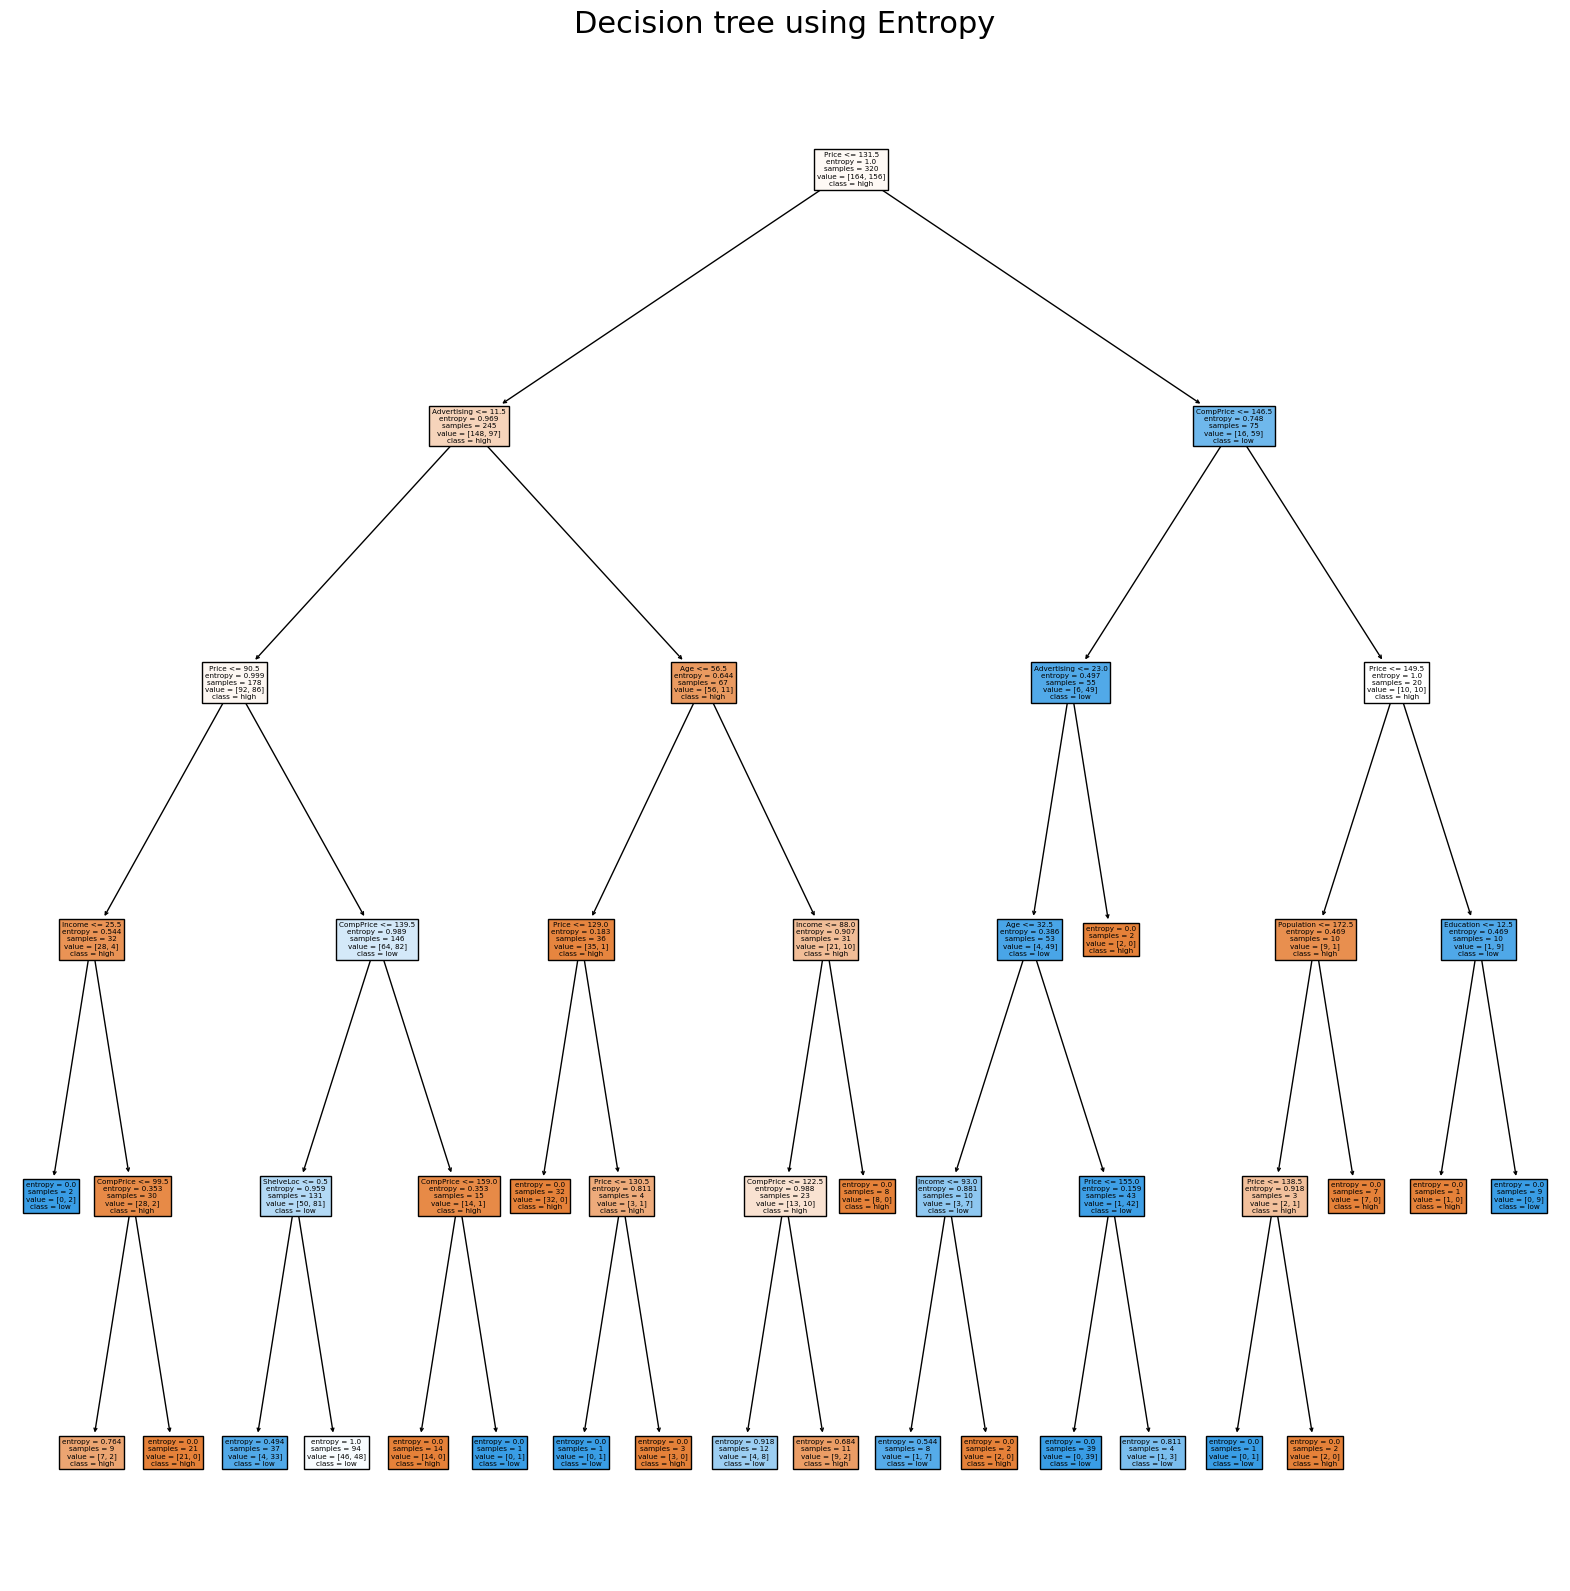

In [54]:
fig = plt.figure(figsize=(20,20))
fig=tree.plot_tree(model,feature_names=['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
                                     'Urban', 'US'],class_names=['high','low'],filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

**BUILDIND DECISION TREE USING GINI CRITERIA**

In [63]:
gini=DecisionTreeClassifier(criterion='gini',max_depth=5)
gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
preds=model.predict(x_test)

In [66]:
print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds
))

0.675
              precision    recall  f1-score   support

        high       0.65      0.57      0.61        35
         low       0.69      0.76      0.72        45

    accuracy                           0.68        80
   macro avg       0.67      0.66      0.66        80
weighted avg       0.67      0.68      0.67        80



Text(0.5, 1.0, 'Decision tree using GINI Criterion')

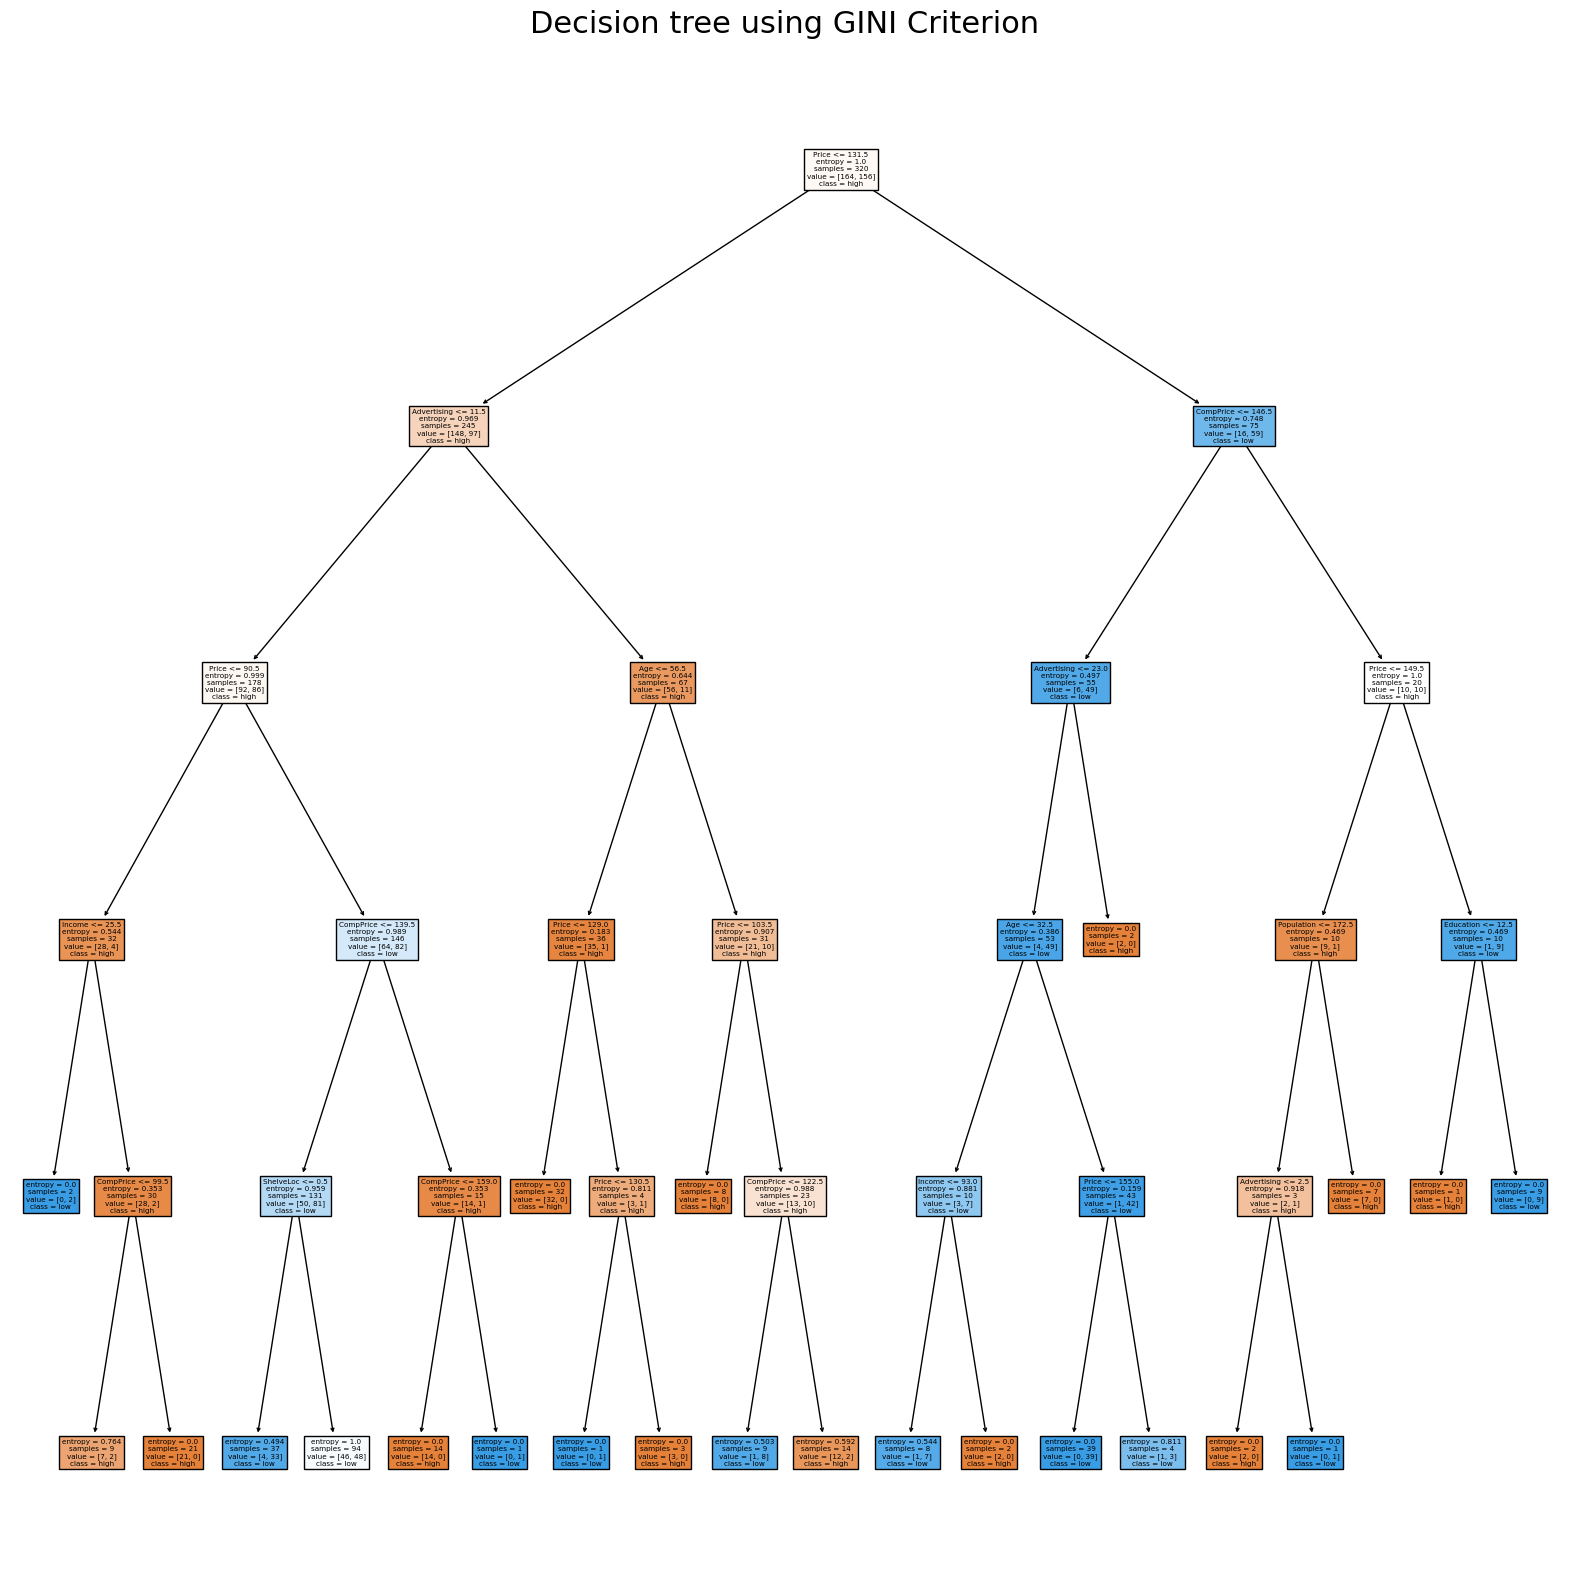

In [68]:
fig = plt.figure(figsize=(20,20))
fig=tree.plot_tree(model,feature_names=['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
                                     'Urban', 'US'],class_names=['high','low'],filled=True)
plt.title('Decision tree using GINI Criterion',fontsize=22)

**hence from the both of the tree's we can understand that the most immportant constraints of the given data are price ,advertising and comp price that are effecting sales**

**FRAUD_CHECK DECISION TREE**
Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [6]:
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [7]:
data1=pd.read_csv('Fraud_check.csv')

In [8]:
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [12]:
data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [13]:
data1.shape


(600, 6)

In [14]:
data1.duplicated().sum()

0

In [16]:
data1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [18]:
taxable=[]
for val in data1['Taxable.Income']:
  if val <= 30000:
    taxable.append('Risky')
  else:
    taxable.append('Good')
data1['taxable']=taxable

In [56]:
from sklearn.preprocessing import LabelEncoder
data1[['Undergrad','Marital.Status','Urban']]=(data1[['Undergrad','Marital.Status','Urban']]).apply(LabelEncoder().fit_transform)

In [57]:
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [75]:
x=data1.drop(['Taxable.Income','taxable'],axis=1)
y=data1['taxable']

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

**BUILDIND DECISION TREE USING ENTROPY**

In [77]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [78]:
pred=model1.predict(x_test)

In [79]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.7777777777777778
              precision    recall  f1-score   support

        Good       0.78      1.00      0.88       140
       Risky       0.00      0.00      0.00        40

    accuracy                           0.78       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.60      0.78      0.68       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Decision tree using Entropy')

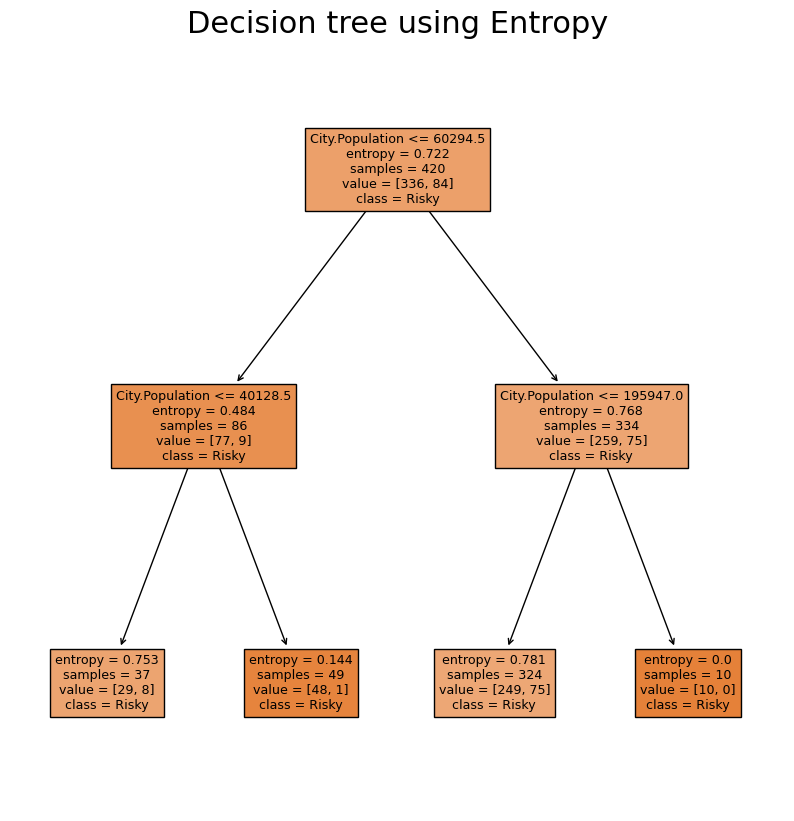

In [80]:
fig=plt.figure(figsize=(10,10))
fig=tree.plot_tree(model1,feature_names=['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [83]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [84]:
model_gini.fit(x_train,y_train)
DecisionTreeClassifier(max_depth=2)
pred=model_gini.predict(x_test)
np.mean(pred==y_test)


0.7777777777777778

Text(0.5, 1.0, 'Decision tree using Gini')

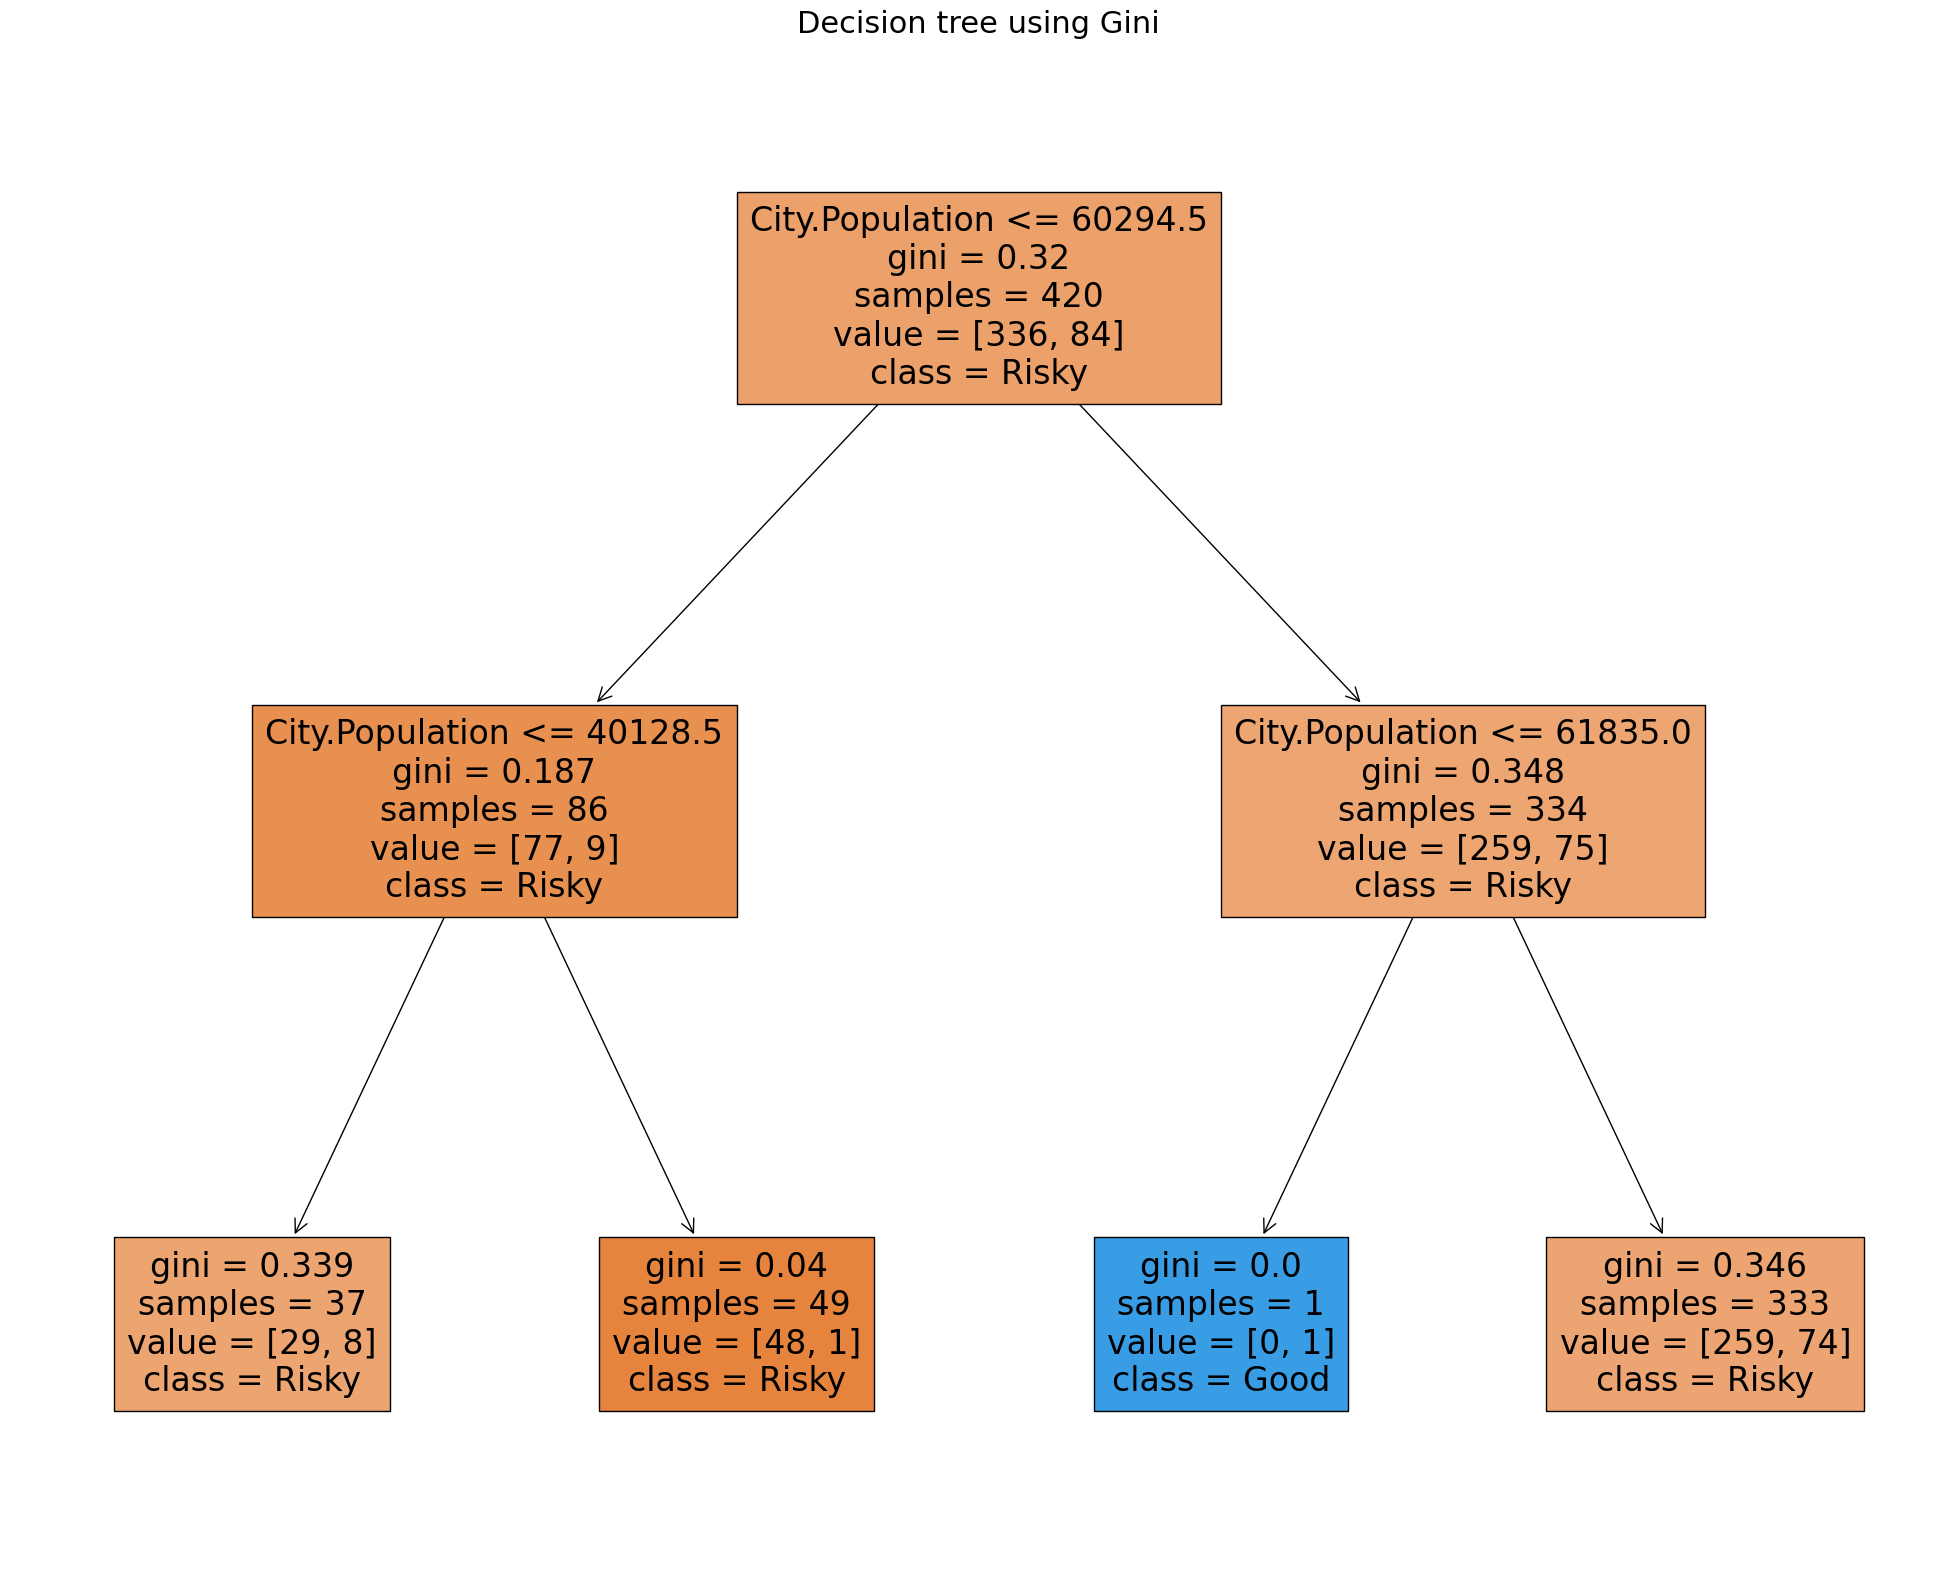

In [85]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)

**hence from here we can understanf that most important features out of here is marital status and city Population**